In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# with open("s1.txt", "r") as f:
#     lines = f.readlines()
#     data = []
#     for line in lines:
#         arr = list(map(float, line.strip().split("   ")))
#         data.append(arr)

# data = np.array(data)

data = pd.read_csv("s1.txt", sep="    ", header=None, names=('x', 'y'), engine="python")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
x    5000 non-null int64
y    5000 non-null int64
dtypes: int64(2)
memory usage: 78.2 KB


In [3]:
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


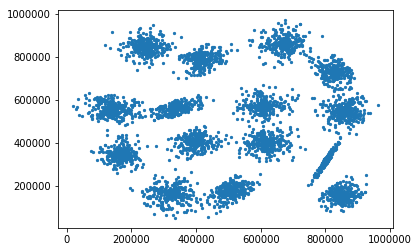

In [4]:
plt.scatter(data['x'], data['y'], s=5)

In [5]:
m = len(data)

X = data.to_numpy()

In [6]:
def KMeans(X, k):
    m, n = X.shape
    
    index = np.random.choice(m, k)
    means = X[index]
    
    clusters = np.copy(means).reshape(k, 1, n).tolist()
    
    for l in range(10):
        clusters = np.copy(means).reshape(k, 1, n).tolist()
        
        for i in range(m):
            dist = []
            for j in range(k):
                d = np.linalg.norm(X[i] - means[j])
                dist.append(d)
    
            idx = dist.index(min(dist))
            clusters[idx].append(X[i].tolist())
    
#         clusters = np.array(clusters, dtype='object')

        for i in range(k):
            c = np.sum(clusters[i], axis = 0) / len(clusters[i])
            means[i] = c

    return means, clusters

In [7]:
k = 15

means, clusters = KMeans(X, k)

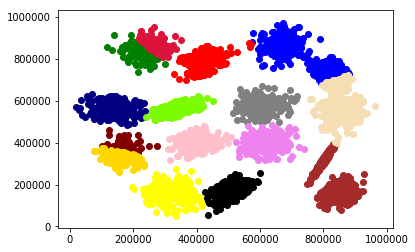

In [8]:
colors = ['yellow','blue','red','green','black','pink','maroon','navy','grey','brown','gold','wheat','crimson','violet','lawngreen']
for i in range(k):
    for j in range(len(clusters[i])):
        plt.scatter(clusters[i][j][0], clusters[i][j][1], c=colors[i])
# plt.scatter(means, '^', c=colors[i])
plt.show()